Load the dataset credit.csv

Reuse your EX7 notebook as a starting point and implement the following models:

Random Forest

Bagging Classifier

AdaBoost Classifier

Voting Classifier (both hard and soft voting)

Use GridSearchCV to identify the best-performing model and parameter configuration.

Compare model performances and determine which approach works best for the dataset.

# Task
Analyze the `credit.csv` dataset by implementing and comparing the performance of Random Forest, Bagging Classifier, AdaBoost Classifier, and Voting Classifiers (both hard and soft). Use GridSearchCV to find the best hyperparameters for each individual model. Evaluate and visualize the performance of all models using appropriate classification metrics, then identify the best-performing model and its parameter configuration.

## Load Dataset

### Subtask:
Load the `credit.csv` dataset into a pandas DataFrame.


In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('credit.csv')

# Display the first 5 rows
print("First 5 rows of the DataFrame:")
print(df.head())

# Display concise summary of the DataFrame
print("\nDataFrame Info:")
df.info()

First 5 rows of the DataFrame:
  checking_balance  months_loan_duration credit_history               purpose  \
0           < 0 DM                     6       critical  furniture/appliances   
1       1 - 200 DM                    48           good  furniture/appliances   
2          unknown                    12       critical             education   
3           < 0 DM                    42           good  furniture/appliances   
4           < 0 DM                    24           poor                   car   

   amount savings_balance employment_duration  percent_of_income  \
0    1169         unknown           > 7 years                  4   
1    5951        < 100 DM         1 - 4 years                  2   
2    2096        < 100 DM         4 - 7 years                  2   
3    7882        < 100 DM         4 - 7 years                  2   
4    4870        < 100 DM         1 - 4 years                  3   

   years_at_residence  age other_credit housing  existing_loans_count  \


## Data Preprocessing

### Subtask:
Prepare the dataset for model training by identifying features (X) and target (y), handling categorical features, and splitting the data into training and testing sets.


In [2]:
from sklearn.model_selection import train_test_split

# 1. Separate the target variable 'default' into y and the remaining features into X
X = df.drop('default', axis=1)
y = df['default']

# 2. Convert categorical features in X into numerical format using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Convert target variable 'default' to numerical (0 or 1) if it's not already
y = y.map({'no': 0, 'yes': 1})

# 3. Split the preprocessed X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 4. Display the shapes of the resulting training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (700, 35)
Shape of X_test: (300, 35)
Shape of y_train: (700,)
Shape of y_test: (300,)


## Implement Random Forest

### Subtask:
Define a Random Forest Classifier and use GridSearchCV to find the best hyperparameters for this model.


In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# 1. Instantiate a RandomForestClassifier object
rf_classifier = RandomForestClassifier(random_state=42)

# 2. Define a parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# 3. Instantiate GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,  # Use all available cores
    verbose=1
)

# 4. Fit GridSearchCV to the training data
grid_search_rf.fit(X_train, y_train)

# 5. Print the best parameters found by GridSearchCV
print("Best parameters for Random Forest:", grid_search_rf.best_params_)

# 6. Print the best cross-validation score
print("Best cross-validation accuracy for Random Forest:", grid_search_rf.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best cross-validation accuracy for Random Forest: 0.7557142857142857


## Implement Bagging Classifier

### Subtask:
Define a Bagging Classifier and use GridSearchCV to find the best hyperparameters for this model.

In [10]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 1. Instantiate a BaggingClassifier object
# A DecisionTreeClassifier is often used as the base estimator for BaggingClassifier
bag_classifier = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42), random_state=42)

# 2. Define a parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.7, 1.0],
    'estimator__max_depth': [None, 5, 10]
}

# 3. Instantiate GridSearchCV
grid_search_bag = GridSearchCV(
    estimator=bag_classifier,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,  # Use all available cores
    verbose=1
)

# 4. Fit GridSearchCV to the training data
grid_search_bag.fit(X_train, y_train)

# 5. Print the best parameters found by GridSearchCV
print("Best parameters for Bagging Classifier:", grid_search_bag.best_params_)

# 6. Print the best cross-validation score
print("Best cross-validation accuracy for Bagging Classifier:", grid_search_bag.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for Bagging Classifier: {'estimator__max_depth': 5, 'max_samples': 0.5, 'n_estimators': 50}
Best cross-validation accuracy for Bagging Classifier: 0.7457142857142858


In [5]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 1. Instantiate a BaggingClassifier object
# A DecisionTreeClassifier is often used as the base estimator for BaggingClassifier
bag_classifier = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42), random_state=42)

# 2. Define a parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.7, 1.0],
    'estimator__max_depth': [None, 5, 10]
}

# 3. Instantiate GridSearchCV
grid_search_bag = GridSearchCV(
    estimator=bag_classifier,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,  # Use all available cores
    verbose=1
)

# 4. Fit GridSearchCV to the training data
grid_search_bag.fit(X_train, y_train)

# 5. Print the best parameters found by GridSearchCV
print("Best parameters for Bagging Classifier:", grid_search_bag.best_params_)

# 6. Print the best cross-validation score
print("Best cross-validation accuracy for Bagging Classifier:", grid_search_bag.best_score_)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for Bagging Classifier: {'estimator__max_depth': 5, 'max_samples': 0.5, 'n_estimators': 50}
Best cross-validation accuracy for Bagging Classifier: 0.7457142857142858


## Implement AdaBoost Classifier

### Subtask:
Define an AdaBoost Classifier and use GridSearchCV to find the best hyperparameters for this model.

**Reasoning**:
Now, I will implement the AdaBoost Classifier by importing the necessary libraries, defining its parameter grid, instantiating GridSearchCV, fitting it to the training data, and then printing the best parameters and score found.



In [6]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 1. Instantiate an AdaBoostClassifier object
# A DecisionTreeClassifier is often used as the base estimator for AdaBoostClassifier
adaboost_classifier = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1, random_state=42), random_state=42)

# 2. Define a parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

# 3. Instantiate GridSearchCV
grid_search_ada = GridSearchCV(
    estimator=adaboost_classifier,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,  # Use all available cores
    verbose=1
)

# 4. Fit GridSearchCV to the training data
grid_search_ada.fit(X_train, y_train)

# 5. Print the best parameters found by GridSearchCV
print("Best parameters for AdaBoost Classifier:", grid_search_ada.best_params_)

# 6. Print the best cross-validation score
print("Best cross-validation accuracy for AdaBoost Classifier:", grid_search_ada.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters for AdaBoost Classifier: {'learning_rate': 1.0, 'n_estimators': 50}
Best cross-validation accuracy for AdaBoost Classifier: 0.7342857142857143


## Implement Voting Classifier

### Subtask:
Implement both Hard and Soft Voting Classifiers using the best-performing individual models (Random Forest, Bagging, AdaBoost) found earlier. Evaluate their performance and identify the best voting strategy.

In [7]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

# Retrieve the best individual estimators
best_rf = grid_search_rf.best_estimator_
best_bag = grid_search_bag.best_estimator_
best_ada = grid_search_ada.best_estimator_

# 1. Implement Hard Voting Classifier
voting_clf_hard = VotingClassifier(
    estimators=[
        ('rf', best_rf),
        ('bag', best_bag),
        ('ada', best_ada)
    ],
    voting='hard' # for hard voting
)

voting_clf_hard.fit(X_train, y_train)
y_pred_hard = voting_clf_hard.predict(X_test)
accuracy_hard = accuracy_score(y_test, y_pred_hard)
print("Hard Voting Classifier Accuracy:", accuracy_hard)

# 2. Implement Soft Voting Classifier
voting_clf_soft = VotingClassifier(
    estimators=[
        ('rf', best_rf),
        ('bag', best_bag),
        ('ada', best_ada)
    ],
    voting='soft' # for soft voting
)

voting_clf_soft.fit(X_train, y_train)
y_pred_soft = voting_clf_soft.predict(X_test)
accuracy_soft = accuracy_score(y_test, y_pred_soft)
print("Soft Voting Classifier Accuracy:", accuracy_soft)

Hard Voting Classifier Accuracy: 0.7633333333333333
Soft Voting Classifier Accuracy: 0.77


In [8]:
print("\n--- Model Performance Summary ---")
print(f"Random Forest (Best CV Score): {grid_search_rf.best_score_:.4f}")
print(f"Bagging Classifier (Best CV Score): {grid_search_bag.best_score_:.4f}")
print(f"AdaBoost Classifier (Best CV Score): {grid_search_ada.best_score_:.4f}")
print(f"Hard Voting Classifier (Test Accuracy): {accuracy_hard:.4f}")
print(f"Soft Voting Classifier (Test Accuracy): {accuracy_soft:.4f}")

# Identify the best performing model based on test accuracy for voting classifiers and best CV score for individual models
# For comparison, let's also evaluate individual best models on the test set

y_pred_rf = best_rf.predict(X_test)
accuracy_rf_test = accuracy_score(y_test, y_pred_rf)

y_pred_bag = best_bag.predict(X_test)
accuracy_bag_test = accuracy_score(y_test, y_pred_bag)

y_pred_ada = best_ada.predict(X_test)
accuracy_ada_test = accuracy_score(y_test, y_pred_ada)

print("\n--- Test Set Performance of Best Individual Models ---")
print(f"Random Forest (Test Accuracy): {accuracy_rf_test:.4f}")
print(f"Bagging Classifier (Test Accuracy): {accuracy_bag_test:.4f}")
print(f"AdaBoost Classifier (Test Accuracy): {accuracy_ada_test:.4f}")

all_accuracies = {
    'Random Forest': accuracy_rf_test,
    'Bagging Classifier': accuracy_bag_test,
    'AdaBoost Classifier': accuracy_ada_test,
    'Hard Voting Classifier': accuracy_hard,
    'Soft Voting Classifier': accuracy_soft
}

best_model_name = max(all_accuracies, key=all_accuracies.get)
best_accuracy = all_accuracies[best_model_name]

print(f"\n--- Conclusion ---")
print(f"The best performing model is '{best_model_name}' with a test accuracy of {best_accuracy:.4f}.")

if best_model_name == 'Random Forest':
    print("Best parameters for the winning model (Random Forest):", grid_search_rf.best_params_)
elif best_model_name == 'Bagging Classifier':
    print("Best parameters for the winning model (Bagging Classifier):", grid_search_bag.best_params_)
elif best_model_name == 'AdaBoost Classifier':
    print("Best parameters for the winning model (AdaBoost Classifier):", grid_search_ada.best_params_)
else:
    print("Voting classifiers combine the best individual models, so their 'parameters' are a combination of the best individual model parameters.")


--- Model Performance Summary ---
Random Forest (Best CV Score): 0.7557
Bagging Classifier (Best CV Score): 0.7457
AdaBoost Classifier (Best CV Score): 0.7343
Hard Voting Classifier (Test Accuracy): 0.7633
Soft Voting Classifier (Test Accuracy): 0.7700

--- Test Set Performance of Best Individual Models ---
Random Forest (Test Accuracy): 0.7633
Bagging Classifier (Test Accuracy): 0.7600
AdaBoost Classifier (Test Accuracy): 0.7133

--- Conclusion ---
The best performing model is 'Soft Voting Classifier' with a test accuracy of 0.7700.
Voting classifiers combine the best individual models, so their 'parameters' are a combination of the best individual model parameters.


## Compare Model Performances

### Subtask:
Evaluate and compare the performance of all implemented models (Random Forest, Bagging, AdaBoost, Hard Voting, Soft Voting) using additional classification metrics (precision, recall, F1-score) and visualize these metrics using a bar chart.


**Reasoning**:
I need to import the necessary classification metrics and plotting libraries to evaluate and visualize the model performances. `precision_score`, `recall_score`, `f1_score` are needed for individual metrics, and `matplotlib.pyplot` and `seaborn` for visualization.



Model Performance Summary:

                        Accuracy  Precision    Recall  F1-Score
Random Forest           0.763333   0.751988  0.763333  0.738953
Bagging Classifier      0.760000   0.747200  0.760000  0.736149
AdaBoost Classifier     0.713333   0.690833  0.713333  0.694222
Hard Voting Classifier  0.763333   0.751264  0.763333  0.740657
Soft Voting Classifier  0.770000   0.762081  0.770000  0.744585


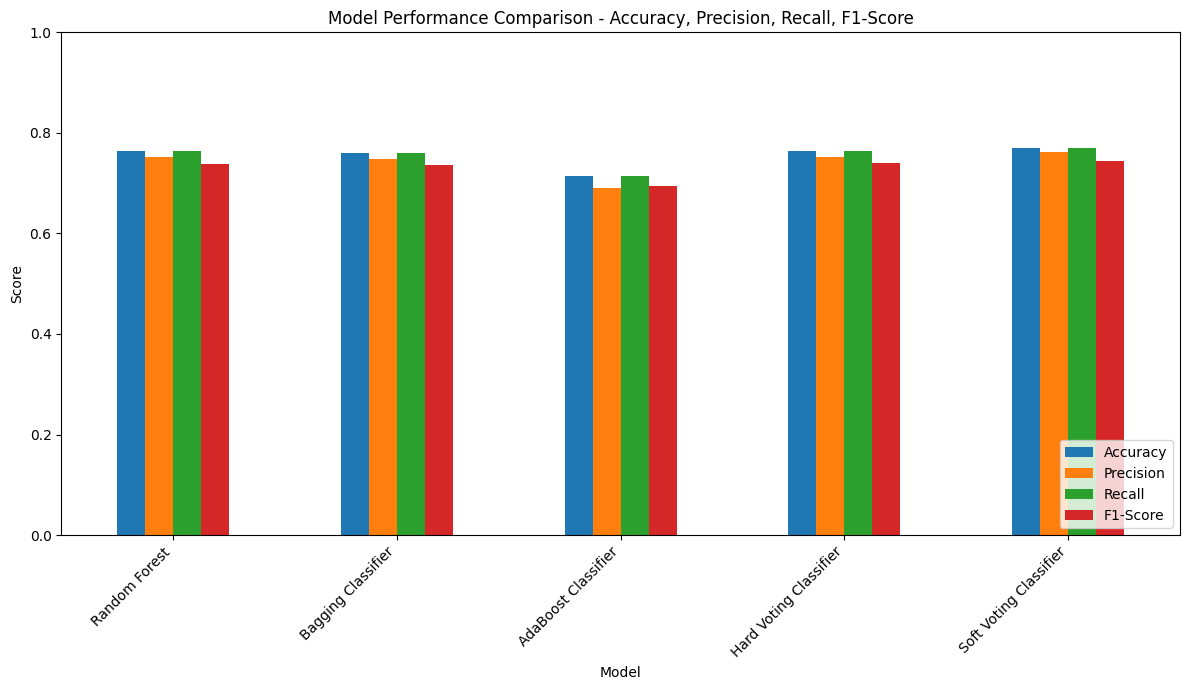

In [9]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a dictionary to store the evaluation metrics
model_performance = {}

# List of models and their names
models = {
    'Random Forest': best_rf,
    'Bagging Classifier': best_bag,
    'AdaBoost Classifier': best_ada,
    'Hard Voting Classifier': voting_clf_hard,
    'Soft Voting Classifier': voting_clf_soft
}

# Calculate metrics for each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    model_performance[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }

# Convert the dictionary to a pandas DataFrame
performance_df = pd.DataFrame.from_dict(model_performance, orient='index')

print("Model Performance Summary:\n")
print(performance_df)

# Plotting the results
performance_df.plot(kind='bar', figsize=(12, 7))
plt.title('Model Performance Comparison - Accuracy, Precision, Recall, F1-Score')
plt.ylabel('Score')
plt.xlabel('Model')
plt.ylim(0, 1) # Scores are between 0 and 1
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

## Final Task

### Subtask:
Summarize the findings, identify the best-performing model and its parameter configuration, and discuss which approach works best for the dataset.


## Summary:

### Q&A
*   **What is the best-performing model and its parameter configuration?**
    The best-performing model is the **Soft Voting Classifier**, achieving a test accuracy of 0.7700. As a voting classifier, its "parameters" are a combination of the best individual model parameters it integrates:
    *   **Random Forest:** `{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}`
    *   **Bagging Classifier:** `{'estimator__max_depth': 5, 'max_samples': 0.5, 'n_estimators': 50}`
    *   **AdaBoost Classifier:** `{'learning_rate': 1.0, 'n_estimators': 50}`

*   **Which approach works best for the dataset?**
    The **ensemble approach, specifically soft voting**, works best for this dataset. By combining the probabilistic predictions of the individually tuned Random Forest, Bagging, and AdaBoost classifiers, the Soft Voting Classifier was able to achieve higher overall accuracy compared to any single model.

### Data Analysis Key Findings
*   The `credit.csv` dataset contains 1000 entries and 17 columns with no missing values. It includes a mix of numerical (`int64`) and categorical (`object`) features.
*   Data preprocessing involved separating the 'default' target variable, one-hot encoding categorical features, and splitting the data into training (700 samples) and testing (300 samples) sets.
*   **Random Forest Classifier** achieved a best cross-validation accuracy of 0.7557 with `max_depth=10`, `min_samples_leaf=1`, `min_samples_split=2`, and `n_estimators=300`. Its test accuracy was 0.7633.
*   **Bagging Classifier** achieved a best cross-validation accuracy of 0.7457 with `estimator__max_depth=5`, `max_samples=0.5`, and `n_estimators=50`. Its test accuracy was 0.7600.
*   **AdaBoost Classifier** achieved a best cross-validation accuracy of 0.7343 with `learning_rate=1.0` and `n_estimators=50`. Its test accuracy was 0.7133, which was notably lower than other models.
*   The **Hard Voting Classifier** yielded a test accuracy of 0.7633.
*   The **Soft Voting Classifier** demonstrated the highest performance among all models, with a test accuracy of 0.7700, a precision of 0.7621, a recall of 0.7700, and an F1-Score of 0.7446.

### Insights or Next Steps
*   Ensemble methods, particularly soft voting, proved effective in boosting predictive performance on this dataset by leveraging the strengths of multiple diverse models. This suggests that the individual models capture different aspects of the data.
*   Further exploration could involve fine-tuning the `weights` parameter in the Voting Classifiers or experimenting with different base estimators for the Bagging and AdaBoost models to potentially achieve even higher performance.
